<a href="https://colab.research.google.com/github/Isaac0123/CS418Final/blob/main/CS418Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Cleaning and Analysis

OPEN GITHUB : https://github.com/Isaac0123/CS418Final

In [ ]:
import pandas as pd
import numpy as np
import math
import csv
import datetime
from matplotlib import pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Project


#make sure to click and drag necessary files into the files section of the google colab!
#deforestation by forest in the amazon by KM^2 (https://www.kaggle.com/code/sasakitetsuya/global-cumulative-co2-emission-gap-analysis/input)
forests = pd.read_csv('forests.csv')
forests.columns = forests.iloc[0]
forests = forests[1:]
#reset index for easier concatanation later
forests = forests.reset_index(drop=True)

forests
#emissions of brazil over the years by tons (https://ourworldindata.org/)
emissions = pd.read_csv('CO2 emission by countries.csv',encoding='latin1')
#we take only the 3 main columns we need to filter
emissionsMain = emissions[['Country','Year','CO2 emission (Tons)']]
#we filter by country 'brazil' and the year 'greater than 1987'
emissionsMain = emissionsMain[(emissionsMain.Country =="Brazil")]
emissionsMain = emissionsMain[(emissionsMain.Year > 1987)]
#we now have the emissions data we need
dataframes = [forests,emissionsMain.reset_index()]
#concat the two dataframes togethor
final = pd.concat(dataframes,axis = 1)
#we will have extra columns so we need to drop thos
final = final.drop(columns=['Year'])

# Log transformation columns
final["Total Deforestation Log"] = np.log(final["AMZ LEGAL"].astype(int))
final["CO2 emission Log"] = np.log(final["CO2 emission (Tons)"])

final = final.drop([33,34])

#our final dataset after being cleaned and explored
final

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Project


,Year/States,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL,index,Country,CO2 emission (Tons),Total Deforestation Log,CO2 emission Log
0,1988,620,1510,60,2450,5140,6990,2340,290,1650,21050,7555.0,Brazil,4.219243e+09,9.954656,22.162922
1,1989,540,1180,130,1420,5960,5750,1430,630,730,17770,7556.0,Brazil,4.431374e+09,9.785267,22.211975
2,1990,550,520,250,1100,4020,4890,1670,150,580,13730,7557.0,Brazil,4.650032e+09,9.527338,22.260140
3,1991,380,980,410,670,2840,3780,1110,420,440,11030,7558.0,Brazil,4.879426e+09,9.308374,22.308293
4,1992,400,799,36,1135,4674,3787,2265,281,409,13786,7559.0,Brazil,5.113027e+09,9.531409,22.355057
5,1993,482,370,0,372,6220,4284,2595,240,333,14896,7560.0,Brazil,5.357333e+09,9.608848,22.401732
6,1994,482,370,0,372,6220,4284,2595,240,333,14896,7561.0,Brazil,5.611335e+09,9.608848,22.448054
7,1995,1208,2114,9,1745,10391,7845,4730,220,797,29059,7562.0,Brazil,5.880013e+09,10.277084,22.494825
8,1996,433,1023,0,1061,6543,6135,2432,214,320,18161,7563.0,Brazil,6.169324e+09,9.807032,22.542855
9,1997,358,589,18,409,5271,4139,1986,184,273,13227,7564.0,Brazil,6.476273e+09,9.490015,22.591411


Emissions Overtime

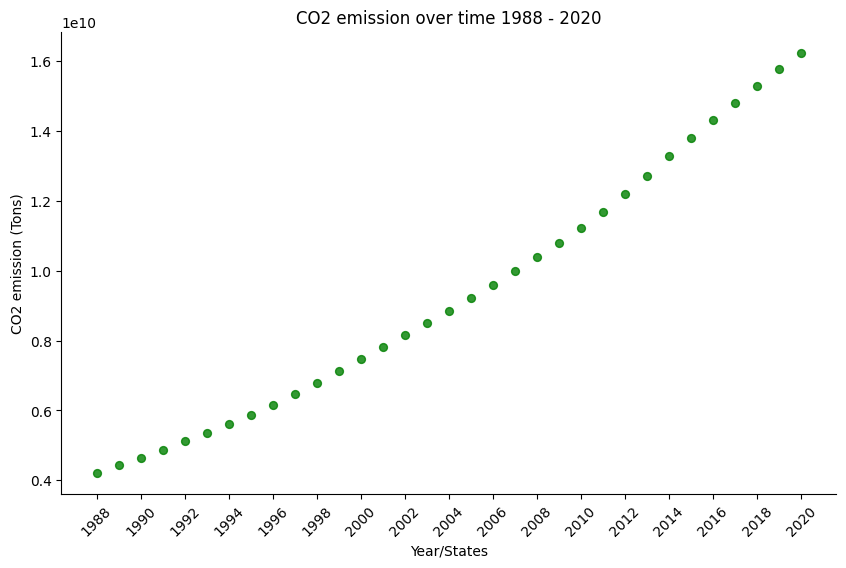

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
final.plot(title='CO2 emission over time 1988 - 2020', kind='scatter', x='Year/States', y='CO2 emission (Tons)', s=32, alpha=.8, color='green')
n = 2
plt.xticks(final['Year/States'][::n], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.gcf().set_size_inches(10, 6)
plt.show()

# Hypothesis Formation and Plot

We hypothesize that deforestation in the Amazon rainforest correlates in some way to Brazil's CO2 emissions.

We will plot these together after a log transformation to see how these points of data correlate.

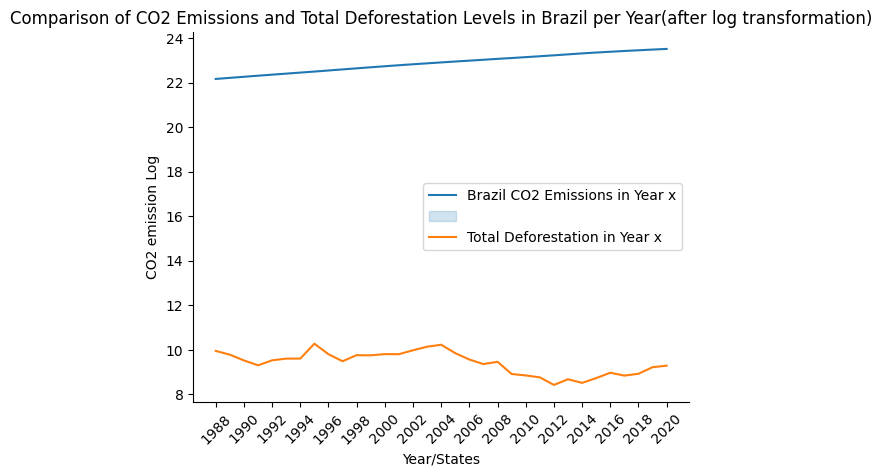

In [ ]:
from matplotlib import pyplot as plt
sns.lineplot(data=final, x='Year/States', y='CO2 emission Log')
sns.lineplot(data=final, x='Year/States', y='Total Deforestation Log').set(title="Comparison of CO2 Emissions and Total Deforestation Levels in Brazil per Year(after log transformation)")


plt.legend(labels=["Brazil CO2 Emissions in Year x", "", "Total Deforestation in Year x"])

n = 2
plt.xticks(final['Year/States'][::n], rotation=45)


#change xtick interval frequency so its better able to be read

plt.gca().spines[['top', 'right',]].set_visible(False)

Following this plot, we see that the totala deforestation per year varies without an obvious trend. However, it is important to realize that the forest does not grow back each year--every year's deforestation adds to that of all previous years. Another chart will be necessary to plot the true cumulative deforestation levels as time progresses.

We noticed that deforestation levels significantly dropped after 2008, less than half of the amount of previous years. This was startling, but was easily explained with some research--In 2008, many countries provided billions of dollars for the preservation of the rainforest, and the state of the Amazon became widely recognized by activists and governments. This massive decline in deforestation levels is absolutely attributed to this global recognition of a problem.

However, we continued to see CO2 emissions rise. A possible causation can be seen closer once the cumulative deforestation amount is plotted. An additional course of action we may take, in the case that the 2009 deforestation drop proves detrimental to a concentrated study, is to apply machine learning to the data to visualize a world in which no measures had ever been taken to prevent the Amazon's degradation, creating future projections for CO2 levels in a world with a dwindling Amazon.


# Reflection

a discussion of the following:

What is the hardest part of the project that you’ve encountered so far?

**Answer: The hardest part would probably be finding datasets and making sure that each one has good integrity and usability.**

○ What are your initial insights?

**Answer: The data is usable and can give us some valuable insight as to the affects that deforestation can on have on Brazils carbon footprint. So far from what we have seen, deforestation has a correlation to an increase in carbon emissions, especially prior to the 2009 deforestation drop**

○ Are there any concrete results you can show at this point? If not, why not?

**Answer: We have a visualization that shows the increase of deforestation as well as carbon emissions over time. Correlation between the two is highly likely and will likely continue to be solidified once a cumulative deforestation plot is created.**

○ Going forward, what are the current biggest problems you’re facing?

**Answer: The biggest problem we are facing is probably using ML methods on our dataset, ML tends to need some hefty datasets which we don't have. This will lead our machine to overtrain on a small amount of data and have a bias.**

○ Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

**Answer: We got a late start on the project due to scheduling issues and busy work days. However, after putting our heads down and getting to work, we've made a decent amount of progress in a small amount of time. Already, we've come to an understanding of the intricacies of our data, especially in the real-world social and governmental reactions to the trends previously identified in this data and how real world actions have consequences reflected in our analysis.**

○ Given your initial exploration of the data, is it worth proceeding with your project,why? If not, how are you going to change your project and why do you think it’s better than your current results?

**Answer: It may be useful for us to find one final supplementary dataset, as ours are robust but small and limited in what we might be able to extrapolate from them. Our project is worth proceeding with, especially once our schedules allow us to get to the meat of the analysis.**